In [1]:
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('../src/')
import geometry
import solver


Can you please measure the difference of your flow to a Poiseuille flow at distance 7.5 from the obstruction (there you seem to reach the error imposed by the GMRES tolerance) as you increase N?

In [4]:
N = [2**i for i in range(5,13)]

tubes = [geometry.obstructed_tube(N=n) for n in N]

def boundary_condition(tube):
    t = tube.get_t()
    u = 1 - (t.imag)**2
    u[np.abs(t.real) <= 1] = 0
    v = np.zeros(len(t))
    return (u,v)

solvers = [solver.stokes2d(tube, *boundary_condition(tube)) for tube in tubes]

gmres starts solving the Nystorm, please wait...
gmres converged
gmres starts solving the Nystorm, please wait...
gmres converged
gmres starts solving the Nystorm, please wait...
gmres converged
gmres starts solving the Nystorm, please wait...
gmres converged
gmres starts solving the Nystorm, please wait...
gmres converged
gmres starts solving the Nystorm, please wait...
gmres converged
gmres starts solving the Nystorm, please wait...
gmres converged
gmres starts solving the Nystorm, please wait...
gmres converged


Text(0.5, 0.98, 'geometry of the obstructed pipes with varying obstruction height. color denotes the flow in x-direction')

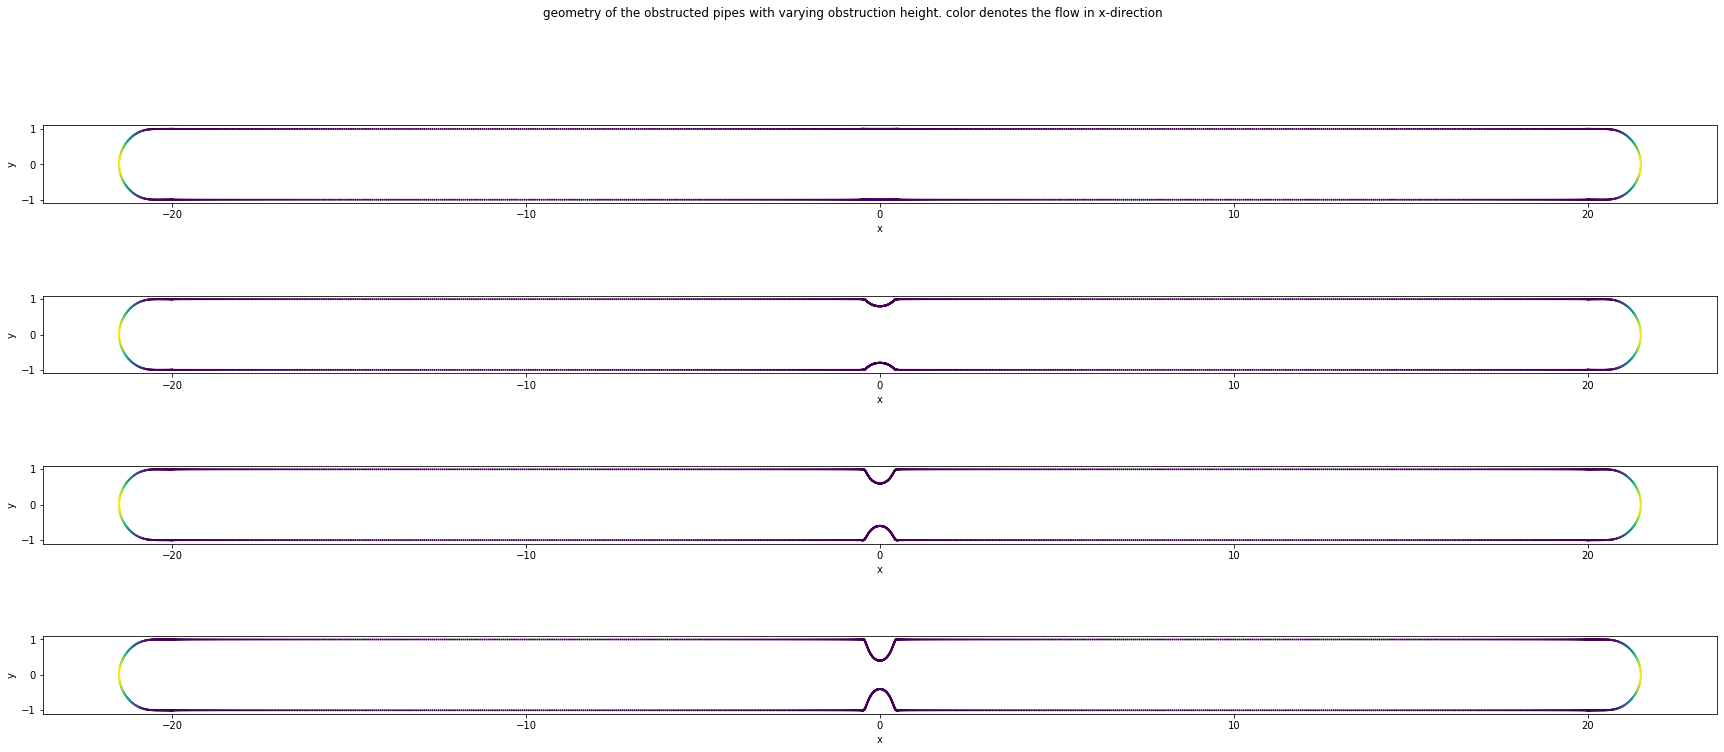

In [4]:
fig, axes = plt.subplots(4,1,figsize=(30,12))

for i in range(4):
    t = tubes[i].get_t()
    axes[i].scatter(t.real, t.imag, c=u,s=1)
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    im = axes[i].set_aspect(1)
    
fig.suptitle('geometry of the obstructed pipes with varying obstruction height. color denotes the flow in x-direction')

# return to poiseuille

In [5]:
grid_x = np.linspace(0,20,50)
grid_z = np.array([grid_x + 1j*y for y in np.linspace(0,0.5,6)])
grid_v = np.array([solver.compute_velocity(grid_z.flatten()).reshape(grid_z.shape) for solver in solvers])
grid_grad_p = np.array([solver.compute_grad_pressure(grid_z.flatten()).reshape(grid_z.shape) for solver in solvers])
poi_v  = (1-grid_z.flatten().imag**2).reshape(grid_z.shape)
poi_grad_p = -2*np.ones(poi_v.shape)

grid_v index: (solvers, y, x)

Text(0.5, 1.0, 'abs velocity diff between the poiseuille flow and the computed flow along axis of symmetry y=0\nR=1, L=40, N=2^12, y=0')

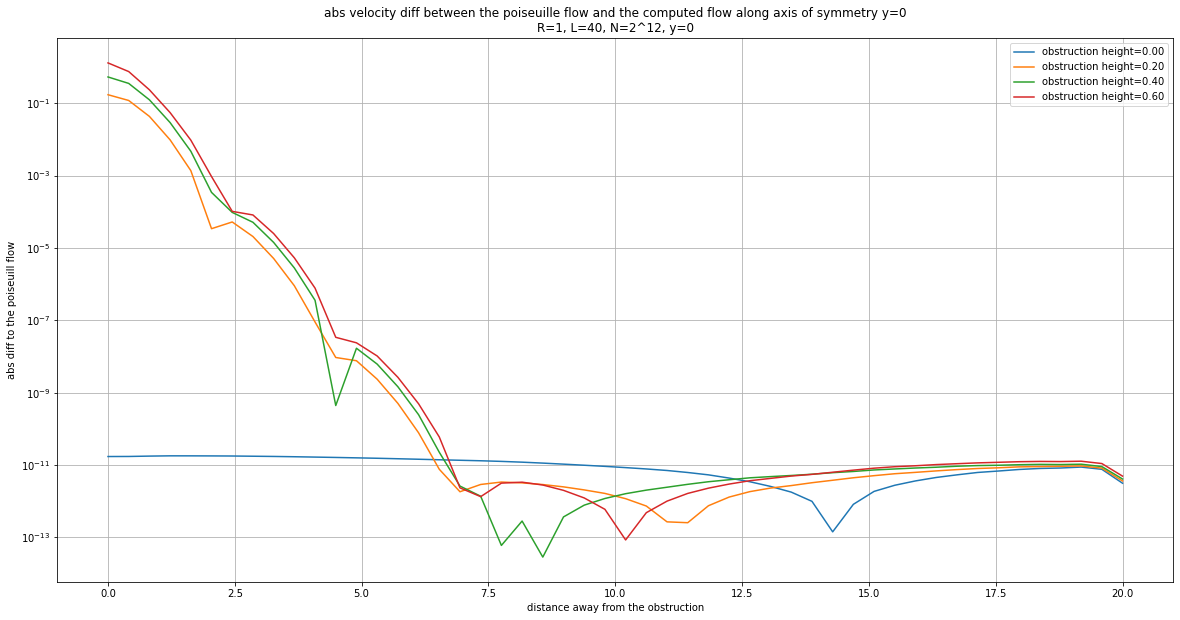

In [6]:
plt.figure(figsize=(20,10))
for i in range(len(solvers)):
    z = grid_z[0]
    v = solvers[i].compute_velocity(z)
    poi_v = 1 - z.imag**2
    abs_diff = np.abs(v - poi_v)
    x = z.real
    plt.semilogy(x,abs_diff,label='obstruction height=%.2f'%obs_h[i])
plt.xlabel('distance away from the obstruction') 
plt.ylabel('abs diff to the poiseuill flow')
plt.legend()
plt.grid('both')
plt.title('abs velocity diff between the poiseuille flow and the computed flow along axis of symmetry y=0\n' + 'R=%d,'%1 + ' L=%d,'%40 + ' N=2^%d, '%12 + 'y=%d'%0)

Text(0.5, 1.0, 'abs grad_p diff between the poiseuille flow and the computed flow along axis of symmetry y=0\nR=1, L=40, N=2^12, y=0')

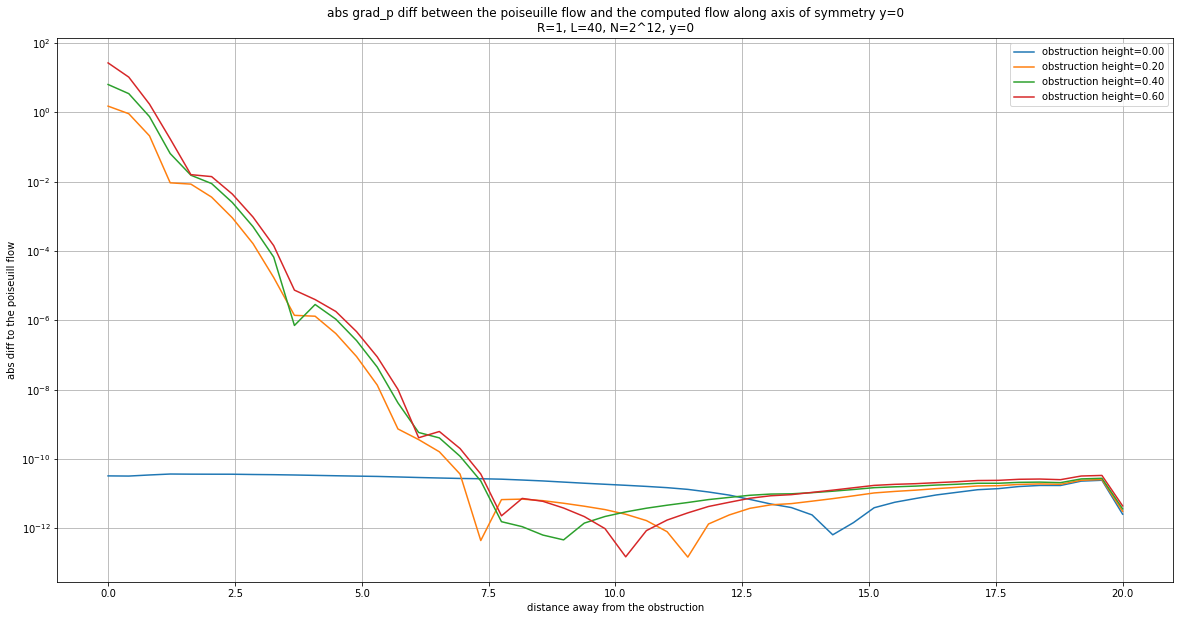

In [7]:
plt.figure(figsize=(20,10))
for i in range(len(solvers)):
    z = grid_z[0]
    grad_p = solvers[i].compute_grad_pressure(z)
    poi_grad_p = -2 * np.ones(grad_p.shape)
    abs_diff = np.abs(grad_p - poi_grad_p)
    x = z.real
    plt.semilogy(x,abs_diff,label='obstruction height=%.2f'%obs_h[i])
plt.xlabel('distance away from the obstruction') 
plt.ylabel('abs diff to the poiseuill flow')
plt.legend()
plt.grid('both')
plt.title('abs grad_p diff between the poiseuille flow and the computed flow along axis of symmetry y=0\n' + 'R=%d,'%1 + ' L=%d,'%40 + ' N=2^%d, '%12 + 'y=%d'%0)

Text(0.5, 0.98, 'abs grad_p diff between the poiseuille flow and the computed flow\nR=1, L=40, N=2^12, y=0')

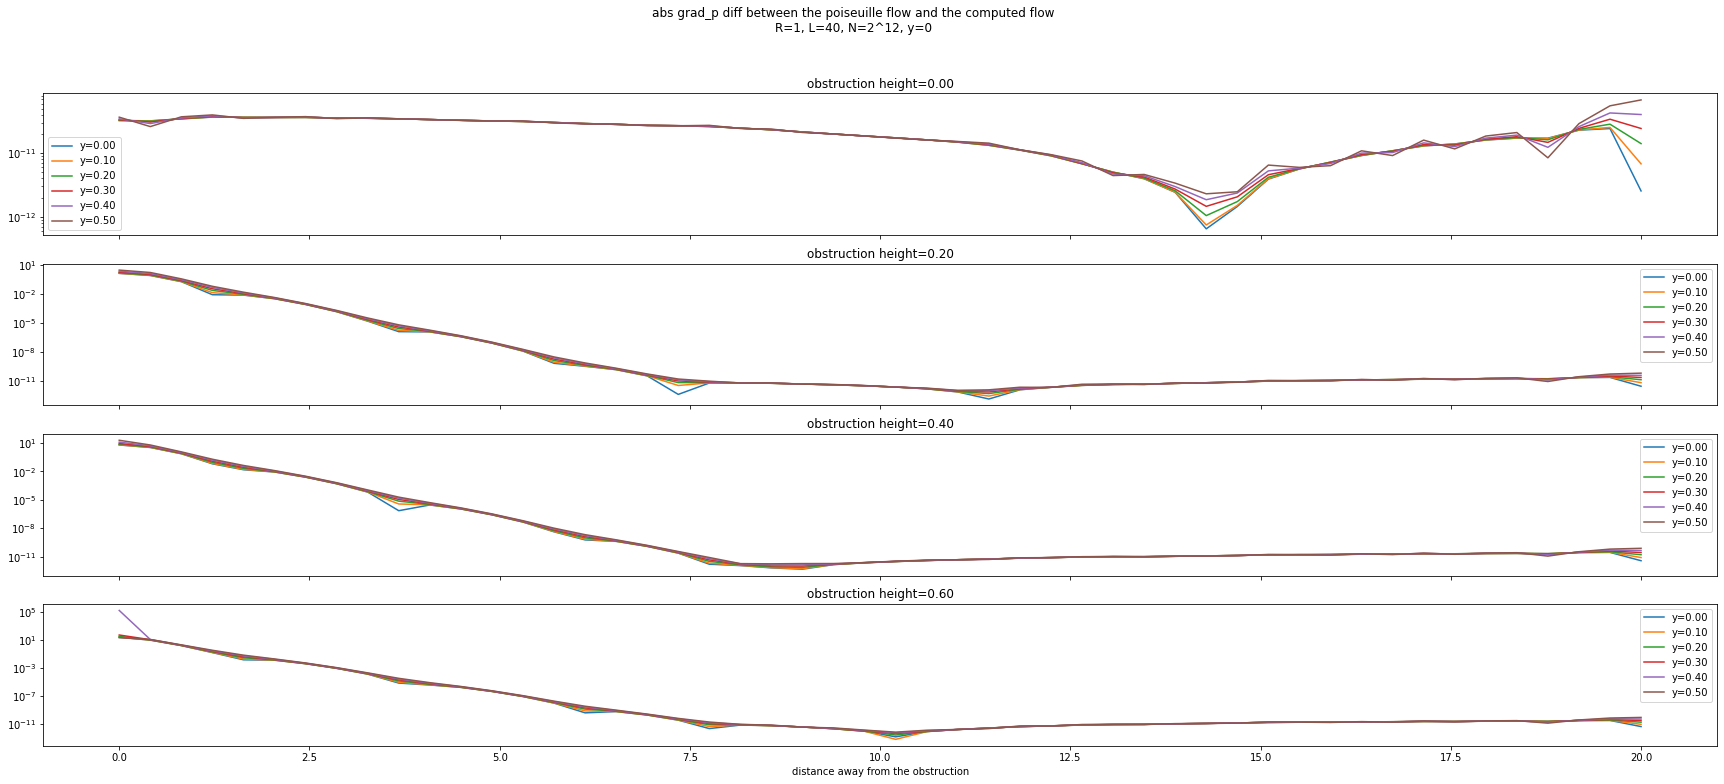

In [8]:
fig, axes = plt.subplots(4,1,figsize=(30,12),sharex=True)
for i in range(len(solvers)):
    
    for j in np.linspace(0,0.5j,6):
        z = grid_x + j
        grad_p = solvers[i].compute_grad_pressure(z)
        poi_grad_p = -2 * np.ones(grad_p.shape)
        abs_diff = np.abs(grad_p - poi_grad_p)
        x = z.real
        axes[i].semilogy(x,abs_diff,label='y=%.2f'%j.imag)
    axes[i].set_title('obstruction height=%.2f'%obs_h[i])
    axes[i].legend()
    
axes[-1].set_xlabel('distance away from the obstruction')
fig.suptitle('abs grad_p diff between the poiseuille flow and the computed flow\n' + 'R=%d,'%1 + ' L=%d,'%40 + ' N=2^%d, '%12 + 'y=%d'%0)

Text(0.5, 0.98, 'abs velocity diff between the poiseuille flow and the computed flow\nR=1, L=40, N=2^12, y=0')

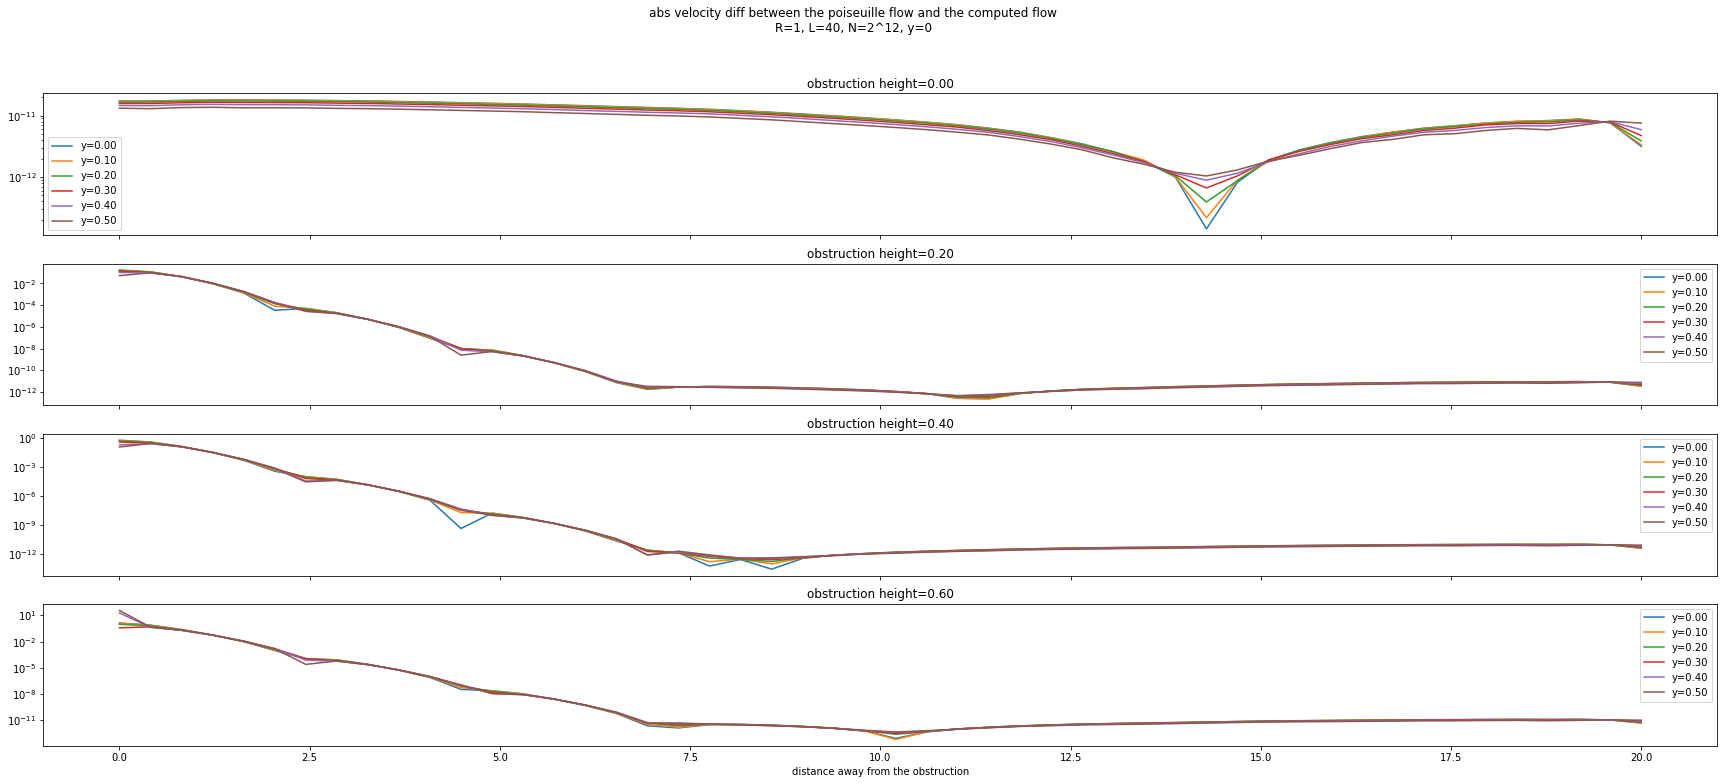

In [9]:
fig, axes = plt.subplots(4,1,figsize=(30,12),sharex=True)
for i in range(len(solvers)):
    
    for j in np.linspace(0,0.5j,6):
        z = grid_x + j
        v = solvers[i].compute_velocity(z)
        poi_v = 1 - z.imag**2
        abs_diff = np.abs(v - poi_v)
        x = z.real
        axes[i].semilogy(x,abs_diff,label='y=%.2f'%j.imag)
    axes[i].set_title('obstruction height=%.2f'%obs_h[i])
    axes[i].legend()
    
axes[-1].set_xlabel('distance away from the obstruction')
fig.suptitle('abs velocity diff between the poiseuille flow and the computed flow\n' + 'R=%d,'%1 + ' L=%d,'%40 + ' N=2^%d, '%12 + 'y=%d'%0)

#